In [55]:
import pandas as pd
import numpy as np


In [56]:
df = pd.read_csv('train.csv')

In [57]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [58]:
train_raw = df[df.YrSold < 2010].reset_index(drop=True)
test_raw = df[df.YrSold >= 2010].reset_index(drop=True)

In [59]:
train_raw.shape

(1285, 81)

In [60]:
test_raw.shape

(175, 81)

In [61]:
train_raw.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
pd.set_option('display.max_columns', 500)
train_raw.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [63]:
cols_num = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
           'MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
            'GrLivArea','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea','YrSold','SalePrice']

In [64]:
df_cols_num = df[cols_num]
df_cols_num

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          196.0        150          856       856       854             0   
1            0.0        284         1262      1262         0             0   
2          162.0        434          920       920       866             0   
3            0.0        540          756       961       756             0   
4          350.0        490         1145      1145      1053             0   
...          ...        ...          ...       ...       ...           ...   
1455         0.0        953          953       953       694             0   
1456       119.0        589         1542      2073         0             0   
1457         0.0        877         1152      1188      1152             0   
1458         0.0          0         1078      1078         0             0   
1459         0.0        136         1256      1256         0             0   

      GrLivArea  TotRmsAbvGrd  GarageYrBlt  GarageCars  GarageArea  YrSold  \
0          1710             8       2003.0           2         548    2008   
1          1262             6       1976.0           2         460    2007   
2          1786             6       2001.0           2         608    2008   
3          1717             7       1998.0           3         642    2006   
4          2198             9       2000.0           3         836    2008   
...         ...           ...          ...         ...         ...     ...   
1455       1647             7       1999.0           2         460    2007   
1456       2073             7       1978.0           2         500    2010   
1457       2340             9       1941.0           1         252    2010   
1458       1078             5       1950.0           1         240    2010   
1459       1256             6       1965.0           1         276    2008   

      SalePrice  
0        208500  
1        181500  
2        223500  
3        140000  
4        250000  
...         ...  
1455     175000  
1456     210000  
1457     266500  
1458     142125  
1459     147500  

[1460 rows x 19 columns]

<font color='red'>Assignment:</font> Get a Dataframe **train** which contains all the numerical columns cols_num.

In [42]:
train= df[cols_num]
train

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          196.0        150          856       856       854             0   
1            0.0        284         1262      1262         0             0   
2          162.0        434          920       920       866             0   
3            0.0        540          756       961       756             0   
4          350.0        490         1145      1145      1053             0   
...          ...        ...          ...       ...       ...           ...   
1455         0.0        953          953       953       694             0   
1456       119.0        589         1542      2073         0             0   
1457         0.0        877         1152      1188      1152             0   
1458         0.0          0         1078      1078         0             0   
1459         0.0        136         1256      1256         0             0   

      GrLivArea  TotRmsAbvGrd  GarageYrBlt  GarageCars  GarageArea  YrSold  \
0          1710             8       2003.0           2         548    2008   
1          1262             6       1976.0           2         460    2007   
2          1786             6       2001.0           2         608    2008   
3          1717             7       1998.0           3         642    2006   
4          2198             9       2000.0           3         836    2008   
...         ...           ...          ...         ...         ...     ...   
1455       1647             7       1999.0           2         460    2007   
1456       2073             7       1978.0           2         500    2010   
1457       2340             9       1941.0           1         252    2010   
1458       1078             5       1950.0           1         240    2010   
1459       1256             6       1965.0           1         276    2008   

      SalePrice  
0        208500  
1        181500  
2        223500  
3        140000  
4        250000  
...         ...  
1455     175000  
1456     210000  
1457     266500  
1458     142125  
1459     147500  

[1460 rows x 19 columns]

<font color='red'>Assignment:</font> Calculate Pearson correlations between all the columns in **train**. Using **DataFrame.corr()**.

In [43]:
train.corr(method ='pearson')


LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage      1.000000  0.426095     0.251646    -0.059213   0.123349   
LotArea          0.426095  1.000000     0.105806    -0.005636   0.014228   
OverallQual      0.251646  0.105806     1.000000    -0.091932   0.572323   
OverallCond     -0.059213 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt        0.123349  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd     0.088866  0.013788     0.550684     0.073741   0.592855   
MasVnrArea       0.193458  0.104160     0.411876    -0.128101   0.315707   
BsmtUnfSF        0.132644 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF      0.392075  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF         0.457181  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF         0.080177  0.050986     0.295493     0.028942   0.010308   
LowQualFinSF     0.038469  0.004779    -0.030429     0.025494  -0.183784   
GrLivArea        0.402797  0.263116     0.593007    -0.079686   0.199010   
TotRmsAbvGrd     0.352096  0.190015     0.427452    -0.057583   0.095589   
GarageYrBlt      0.070250 -0.024947     0.547766    -0.324297   0.825667   
GarageCars       0.285691  0.154871     0.600671    -0.185758   0.537850   
GarageArea       0.344997  0.180403     0.562022    -0.151521   0.478954   
YrSold           0.007450 -0.014261    -0.027347     0.043950  -0.013618   
SalePrice        0.351799  0.263843     0.790982    -0.077856   0.522897   

              YearRemodAdd  MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
LotFrontage       0.088866    0.193458   0.132644     0.392075  0.457181   
LotArea           0.013788    0.104160  -0.002618     0.260833  0.299475   
OverallQual       0.550684    0.411876   0.308159     0.537808  0.476224   
OverallCond       0.073741   -0.128101  -0.136841    -0.171098 -0.144203   
YearBuilt         0.592855    0.315707   0.149040     0.391452  0.281986   
YearRemodAdd      1.000000    0.179618   0.181133     0.291066  0.240379   
MasVnrArea        0.179618    1.000000   0.114442     0.363936  0.344501   
BsmtUnfSF         0.181133    0.114442   1.000000     0.415360  0.317987   
TotalBsmtSF       0.291066    0.363936   0.415360     1.000000  0.819530   
1stFlrSF          0.240379    0.344501   0.317987     0.819530  1.000000   
2ndFlrSF          0.140024    0.174561   0.004469    -0.174512 -0.202646   
LowQualFinSF     -0.062419   -0.069071   0.028167    -0.033245 -0.014241   
GrLivArea         0.287389    0.390857   0.240257     0.454868  0.566024   
TotRmsAbvGrd      0.191740    0.280682   0.250647     0.285573  0.409516   
GarageYrBlt       0.642277    0.252691   0.190708     0.322445  0.233449   
GarageCars        0.420622    0.364204   0.214175     0.434585  0.439317   
GarageArea        0.371600    0.373066   0.183303     0.486665  0.489782   
YrSold            0.035743   -0.008201  -0.041258    -0.014969 -0.013604   
SalePrice         0.507101    0.477493   0.214479     0.613581  0.605852   

              2ndFlrSF  LowQualFinSF  GrLivArea  TotRmsAbvGrd  GarageYrBlt  \
LotFrontage   0.080177      0.038469   0.402797      0.352096     0.070250   
LotArea       0.050986      0.004779   0.263116      0.190015    -0.024947   
OverallQual   0.295493     -0.030429   0.593007      0.427452     0.547766   
OverallCond   0.028942      0.025494  -0.079686     -0.057583    -0.324297   
YearBuilt     0.010308     -0.183784   0.199010      0.095589     0.825667   
YearRemodAdd  0.140024     -0.062419   0.287389      0.191740     0.642277   
MasVnrArea    0.174561     -0.069071   0.390857      0.280682     0.252691   
BsmtUnfSF     0.004469      0.028167   0.240257      0.250647     0.190708   
TotalBsmtSF  -0.174512     -0.033245   0.454868      0.285573     0.322445   
1stFlrSF     -0.202646     -0.014241   0.566024      0.409516     0.233449   
2ndFlrSF      1.000000      0.063353   0.687501      0.616423     0.070832   
LowQualFinSF  0.063353      1.000000

<font color='red'>Question:</font> How is Pearson correlation calcualted? What does it mean?

### Pearson correlation coefficeint is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1.

### Pearson coefficient  of  +1 (strong positive relationship).
###  -1 is a strong negative relationship.


<font color='red'>Assignment:</font> Plot the correlations in heatmap using **seaborn**.

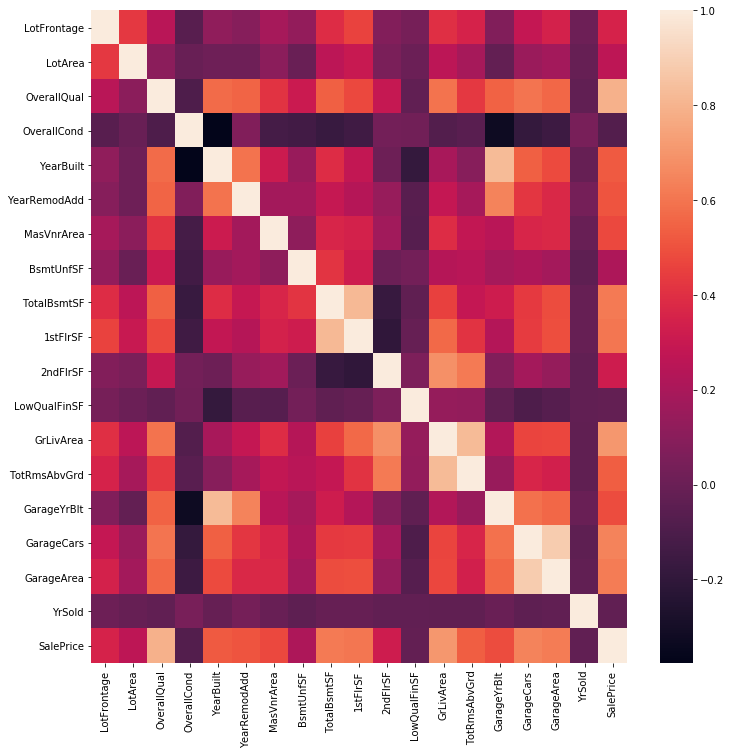

In [44]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
%matplotlib inline
figure(figsize=(12, 12))

sns.heatmap(train.corr());

<font color='red'>Assignment:</font> Visulize the relationships between these columns using **pairplot** in **seaborn**.

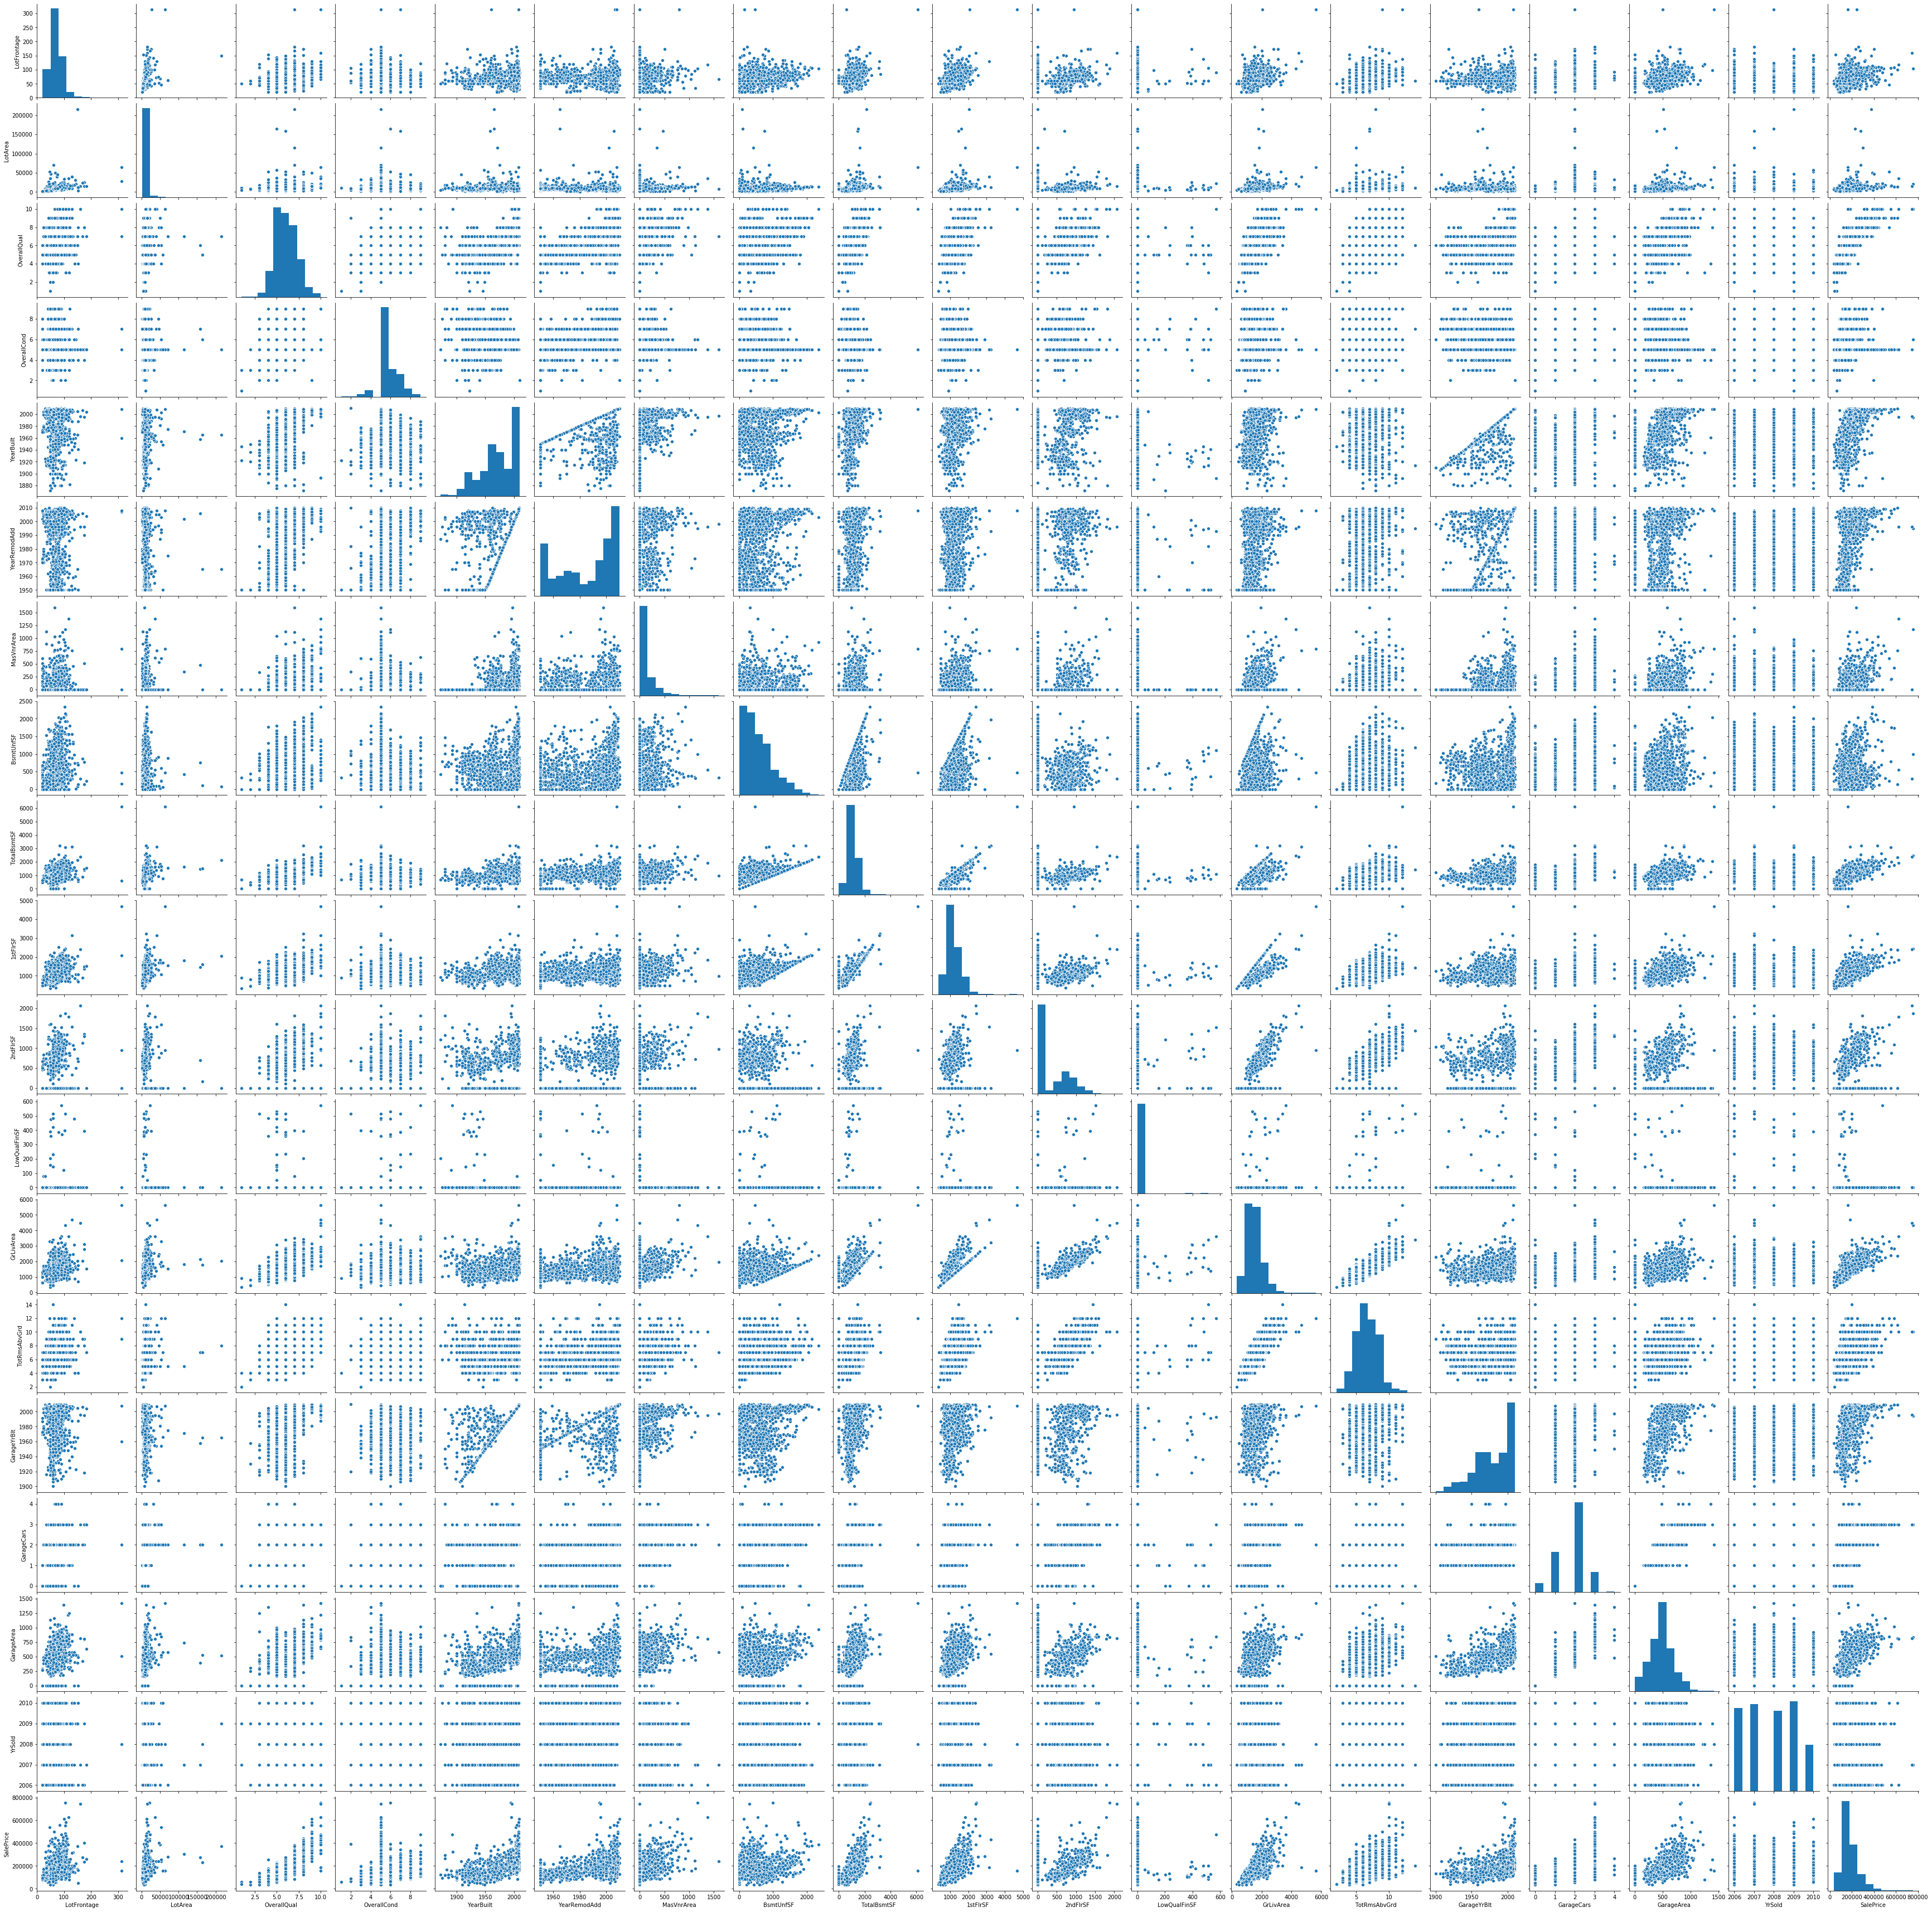

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# train_pairplot= sns.load_dataset(train)
sns.pairplot(train)
plt.show()





<font color='red'>Question:</font> Which features are highly correlated?

### These features that are highly correlated:

### (yr built and garage year built) (garage are and garage cars) (sale price and overall quality)(	TotalBsmtSF and 1st floor sf)

<font color='red'>Assignment:</font> Wrap up MinMaxScaler and linear regression as a pipeline and use the numerical columns cols_num (except sale price column) to predict **sale price**. 

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

steps = [('rescale', MinMaxScaler()),
         ('lr', LinearRegression())]

model = Pipeline(steps)


AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [142]:
train_wosp=train.drop(['SalePrice'],axis=1)
print(train_wosp.isnull)
train_wosp =train_wosp.fillna(train_wosp.mean())
print(train_wosp.isnull)


<bound method DataFrame.isnull of       LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          19

In [146]:
Y_sp = train["SalePrice"].copy()

model.fit(train_wosp, Y_sp)

Pipeline(memory=None,
         steps=[('rescale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

<font color='red'>Assignment:</font> Obtain the training and testing scores. 

In [99]:
test_raw_new = test_raw[['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea','YrSold','SalePrice']]
test_raw_new

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            NaN    11241            6            7       1970          1970   
1            NaN     8246            5            8       1968          2001   
2           60.0     7200            5            7       1951          2000   
3           98.0    11478            8            5       2007          2008   
4           70.0    10552            5            5       1959          1959   
..           ...      ...          ...          ...        ...           ...   
170         90.0     7407            6            7       1957          1996   
171          NaN    26142            5            7       1962          1962   
172         85.0    13175            6            6       1978          1988   
173         66.0     9042            7            9       1941          2006   
174         68.0     9717            5            6       1950          1996   

     MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         180.0        426         1004      1004         0             0   
1           0.0        204         1060      1060         0             0   
2           0.0        180          900       900         0             0   
3         200.0        486         1704      1704         0             0   
4           0.0        380         1398      1700         0             0   
..          ...        ...          ...       ...       ...           ...   
170         0.0        312          912      1236         0             0   
171       189.0        595         1188      1188         0             0   
172       119.0        589         1542      2073         0             0   
173         0.0        877         1152      1188      1152             0   
174         0.0          0         1078      1078         0             0   

     GrLivArea  TotRmsAbvGrd  GarageYrBlt  GarageCars  GarageArea  YrSold  \
0         1004             5       1970.0           2         480    2010   
1         1060             6       1968.0           1         270    2010   
2          900             5       2005.0           2         576    2010   
3         1704             7       2008.0           3         772    2010   
4         1700             6       1959.0           2         447    2010   
..         ...           ...          ...         ...         ...     ...   
170       1236             6       1957.0           2         923    2010   
171       1188             6       1962.0           1         312    2010   
172       2073             7       1978.0           2         500    2010   
173       2340             9       1941.0           1         252    2010   
174       1078             5       1950.0           1         240    2010   

     SalePrice  
0       149000  
1       154000  
2       134800  
3       306000  
4       165500  
..         ...  
170     149700  
171     157900  
172     210000  
173     266500  
174     142125  

[175 rows x 19 columns]

In [103]:
test_raw_x = test_raw_new.drop(['SalePrice'],axis=1)
test_raw_x =test_raw_x.fillna(test_raw_x.mean())
print(test_raw_x.shape)
print(test_raw_x)
test_raw_y= model.predict(test_raw_x)
test_raw_y


(175, 18)
     LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      71.608392    11241            6            7       1970          1970   
1      71.608392     8246            5            8       1968          2001   
2      60.000000     7200            5            7       1951          2000   
3      98.000000    11478            8            5       2007          2008   
4      70.000000    10552            5            5       1959          1959   
..           ...      ...          ...          ...        ...           ...   
170    90.000000     7407            6            7       1957          1996   
171    71.608392    26142            5            7       1962          1962   
172    85.000000    13175            6            6       1978          1988   
173    66.000000     9042            7            9       1941          2006   
174    68.000000     9717            5            6       1950          1996   

     MasVnrArea  BsmtUnfSF  T

array([162574.53074133, 143532.77519679, 136218.00444708, 283031.00762948,
       169883.67662941, 130803.53312134, 281638.7983119 , 114960.50874212,
       176075.72309489, 264647.61531444,  56693.34004003, 153202.38422661,
        70654.73814528, 124153.22391762,  71366.79087945,  89936.78324871,
       215778.12648582, 184983.30257788, 205731.77488486, 228410.58976261,
       187387.96322466, 320007.96959539,  72717.90865174, 130269.65105511,
       222962.85354778, 253179.59870182, 223776.02385994, 240353.67391176,
       195253.25433002, 122410.68254964, 173278.57780615, 160650.61586407,
       111491.60208611, 142351.67886753, 121649.03404163, 207326.24679645,
       204418.82912432, 220745.91728338, 125367.88556173, 253474.62945241,
       233890.45768354,  42295.91796872, 136342.43720898, 141485.36470915,
       297686.00570735, 211714.05719476,  84534.53021444, 105125.34080933,
       278790.01665154, 238124.5230959 ,  93518.12948507, 131916.35273884,
       133914.92161622, 1

### Testscore: MSE for the test dataset:

In [141]:


y_test = test_raw["SalePrice"]     
mse_before_test = mean_squared_error(test_raw_y,y_test,squared='false')
print("Mean squared error for test dataset  before removing YearBuilt is ", mse_before_test)



Mean squared error for test dataset  before removing YearBuilt is  1111597401.6869915



### Training score: MSE for the train dataset:

In [148]:
train_wosp =train_wosp.fillna(train_wosp.mean())
train=train.fillna(train.mean())

train_raw_y = model.predict(train_wosp)
y_train = train["SalePrice"]
print(y_train.shape, train_raw_y.shape)
mse_before_train = mean_squared_error(train_raw_y, y_train, squared='false')
print("Mean squared error for train dataset before removing YearBuilt is ", mse_before_train)


(1460,) (1460,)
Mean squared error for train dataset before removing YearBuilt is  1298076683.474071


<font color='red'>Assignment:</font> Plot the feature importance. Hint: coefficients in linear regression; use plt.bar, plt.xticks(rotation=45, ha='right')

In [155]:
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_raw, trai)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(4)
   .plot(kind='barh'))        

#model.feature_importances_


#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(20).plot(kind='barh')
#plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
#plt.xticks(rotation=45, ha='right')
#plt.show()




NameError: name 'X_train' is not defined

<font color='red'>Question:</font> How do you explain these feature importance?

### Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

### There are many types and sources of feature importance scores, although popular examples include statistical correlation scores, coefficients calculated as part of linear models, decision trees, and permutation importance scores.

### Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimensionality reduction and feature selection that can improve the efficiency and effectiveness of a predictive model on the problem.

<font color='red'>Assignment:</font> Notice that **YieldBuilt** and **GarageYrBlt** are highly correlated. Remove **YearBuilt**, repeat the above steps.?

In [114]:
train1=train.drop(['YearBuilt'], axis = 1)
train1

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0            65.0     8450            7            5          2003   
1            80.0     9600            6            8          1976   
2            68.0    11250            7            5          2002   
3            60.0     9550            7            5          1970   
4            84.0    14260            8            5          2000   
...           ...      ...          ...          ...           ...   
1455         62.0     7917            6            5          2000   
1456         85.0    13175            6            6          1988   
1457         66.0     9042            7            9          2006   
1458         68.0     9717            5            6          1996   
1459         75.0     9937            5            6          1965   

      MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          196.0        150          856       856       854             0   
1            0.0        284         1262      1262         0             0   
2          162.0        434          920       920       866             0   
3            0.0        540          756       961       756             0   
4          350.0        490         1145      1145      1053             0   
...          ...        ...          ...       ...       ...           ...   
1455         0.0        953          953       953       694             0   
1456       119.0        589         1542      2073         0             0   
1457         0.0        877         1152      1188      1152             0   
1458         0.0          0         1078      1078         0             0   
1459         0.0        136         1256      1256         0             0   

      GrLivArea  TotRmsAbvGrd  GarageYrBlt  GarageCars  GarageArea  YrSold  \
0          1710             8       2003.0           2         548    2008   
1          1262             6       1976.0           2         460    2007   
2          1786             6       2001.0           2         608    2008   
3          1717             7       1998.0           3         642    2006   
4          2198             9       2000.0           3         836    2008   
...         ...           ...          ...         ...         ...     ...   
1455       1647             7       1999.0           2         460    2007   
1456       2073             7       1978.0           2         500    2010   
1457       2340             9       1941.0           1         252    2010   
1458       1078             5       1950.0           1         240    2010   
1459       1256             6       1965.0           1         276    2008   

      SalePrice  
0        208500  
1        181500  
2        223500  
3        140000  
4        250000  
...         ...  
1455     175000  
1456     210000  
1457     266500  
1458     142125  
1459     147500  

[1460 rows x 18 columns]

In [115]:
train1.corr(method ='pearson')

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  \
LotFrontage      1.000000  0.306795     0.234196    -0.052820      0.082746   
LotArea          0.306795  1.000000     0.105806    -0.005636      0.013788   
OverallQual      0.234196  0.105806     1.000000    -0.091932      0.550684   
OverallCond     -0.052820 -0.005636    -0.091932     1.000000      0.073741   
YearRemodAdd     0.082746  0.013788     0.550684     0.073741      1.000000   
MasVnrArea       0.179283  0.103960     0.410238    -0.127788      0.179186   
BsmtUnfSF        0.122156 -0.002618     0.308159    -0.136841      0.181133   
TotalBsmtSF      0.363358  0.260833     0.537808    -0.171098      0.291066   
1stFlrSF         0.414266  0.299475     0.476224    -0.144203      0.240379   
2ndFlrSF         0.072483  0.050986     0.295493     0.028942      0.140024   
LowQualFinSF     0.036849  0.004779    -0.030429     0.025494     -0.062419   
GrLivArea        0.368392  0.263116     0.593007    -0.079686      0.287389   
TotRmsAbvGrd     0.320146  0.190015     0.427452    -0.057583      0.191740   
GarageYrBlt      0.064324 -0.024812     0.518018    -0.306169      0.618130   
GarageCars       0.269729  0.154871     0.600671    -0.185758      0.420622   
GarageArea       0.323663  0.180403     0.562022    -0.151521      0.371600   
YrSold           0.006768 -0.014261    -0.027347     0.043950      0.035743   
SalePrice        0.334901  0.263843     0.790982    -0.077856      0.507101   

              MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
LotFrontage     0.179283   0.122156     0.363358  0.414266  0.072483   
LotArea         0.103960  -0.002618     0.260833  0.299475  0.050986   
OverallQual     0.410238   0.308159     0.537808  0.476224  0.295493   
OverallCond    -0.127788  -0.136841    -0.171098 -0.144203  0.028942   
YearRemodAdd    0.179186   0.181133     0.291066  0.240379  0.140024   
MasVnrArea      1.000000   0.114184     0.362452  0.342160  0.174019   
BsmtUnfSF       0.114184   1.000000     0.415360  0.317987  0.004469   
TotalBsmtSF     0.362452   0.415360     1.000000  0.819530 -0.174512   
1stFlrSF        0.342160   0.317987     0.819530  1.000000 -0.202646   
2ndFlrSF        0.174019   0.004469    -0.174512 -0.202646  1.000000   
LowQualFinSF   -0.069068   0.028167    -0.033245 -0.014241  0.063353   
GrLivArea       0.389893   0.240257     0.454868  0.566024  0.687501   
TotRmsAbvGrd    0.280027   0.250647     0.285573  0.409516  0.616423   
GarageYrBlt     0.249367   0.186098     0.311700  0.227127  0.069315   
GarageCars      0.363778   0.214175     0.434585  0.439317  0.183926   
GarageArea      0.372567   0.183303     0.486665  0.489782  0.138347   
YrSold         -0.008184  -0.041258    -0.014969 -0.013604 -0.028700   
SalePrice       0.475241   0.214479     0.613581  0.605852  0.319334   

              LowQualFinSF  GrLivArea  TotRmsAbvGrd  GarageYrBlt  GarageCars  \
LotFrontage       0.036849   0.368392      0.320146     0.064324    0.269729   
LotArea           0.004779   0.263116      0.190015    -0.024812    0.154871   
OverallQual      -0.030429   0.593007      0.427452     0.518018    0.600671   
OverallCond       0.025494  -0.079686     -0.057583    -0.306169   -0.185758   
YearRemodAdd     -0.062419   0.287389      0.191740     0.618130    0.420622   
MasVnrArea       -0.069068   0.389893      0.280027     0.249367    0.363778   
BsmtUnfSF         0.028167   0.240257      0.250647     0.186098    0.214175   
TotalBsmtSF      -0.033245   0.454868      0.285573     0.311700    0.434585   
1stFlrSF         -0.014241   0.566024      0.409516     0.227127    0.439317   
2ndFlrSF          0.063353   0.687501      0.616423     0.069315    0.183926   
LowQualFinSF      1.000000   0.134683      0.131185    -0.029167   -0.094480   
GrLivArea         0.134683   1.000000      0.825489     0.221977    0.467247   
TotRmsAbvGrd      0.131185   0.825489      1.000000     0.140791    0.362289   
GarageYrBlt      -0.029

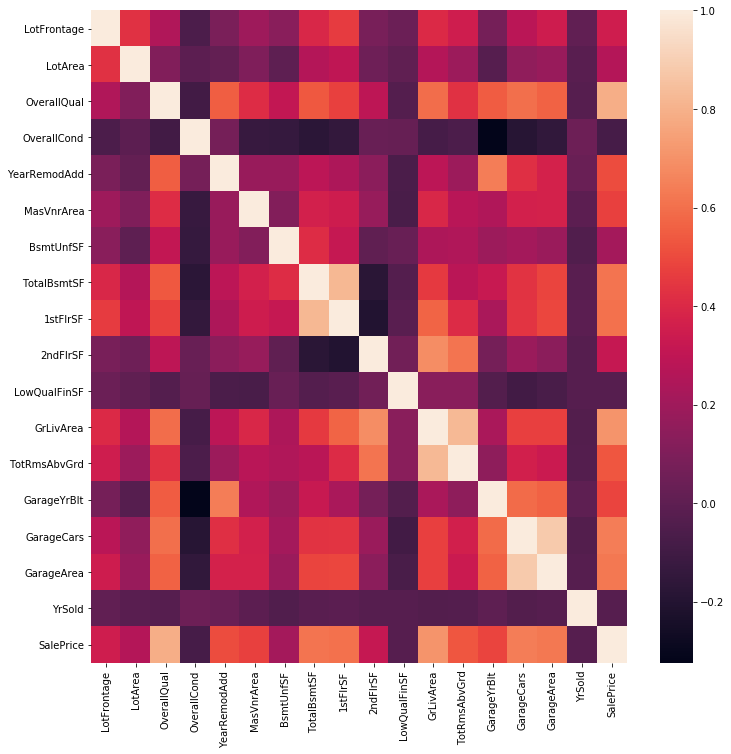

In [58]:
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
%matplotlib inline
figure(figsize=(12, 12))

sns.heatmap(train1.corr());

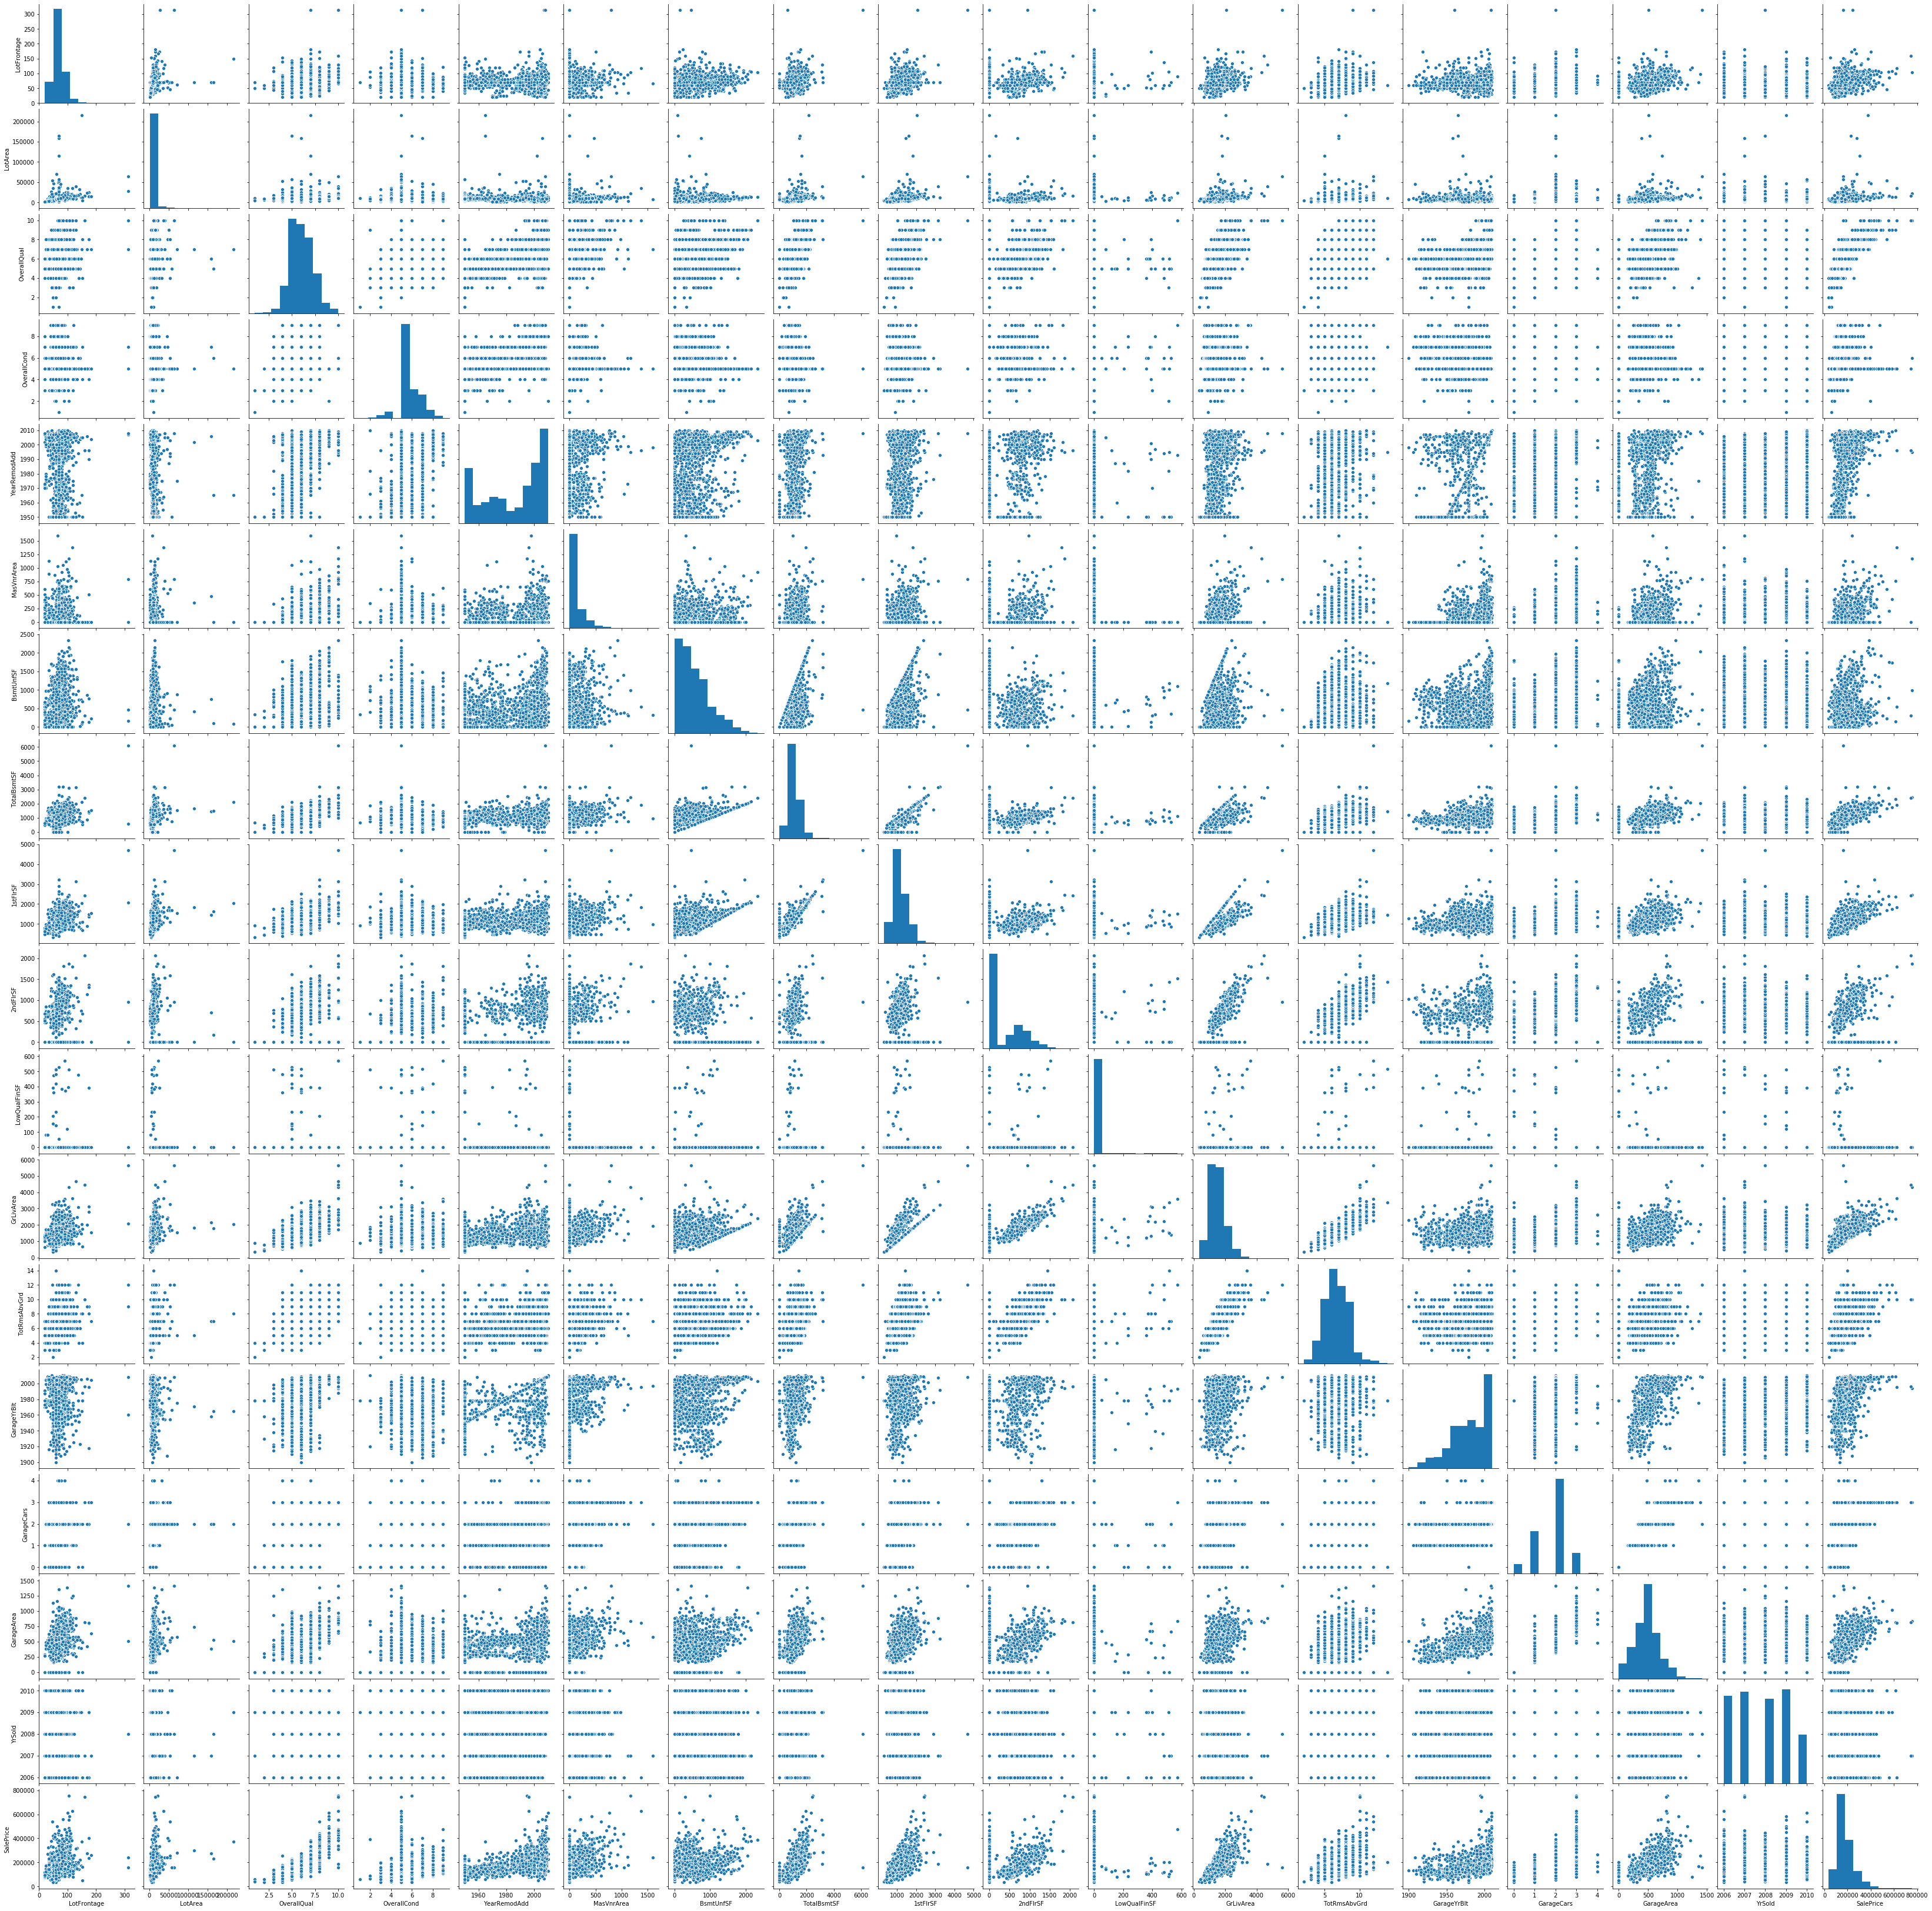

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# train_pairplot= sns.load_dataset(train)
sns.pairplot(train1)
plt.show()




In [117]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

steps = [('rescale', MinMaxScaler()),
         ('lr', LinearRegression())]

model = Pipeline(steps)

In [118]:
train_wosp_new=train1.drop(['SalePrice'],axis=1)
print(train_wosp_new.isnull)
train_wosp_new =train_wosp_new.fillna(train_wosp.mean())
print(train_wosp_new.isnull)


<bound method DataFrame.isnull of       LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0            65.0     8450            7            5          2003   
1            80.0     9600            6            8          1976   
2            68.0    11250            7            5          2002   
3            60.0     9550            7            5          1970   
4            84.0    14260            8            5          2000   
...           ...      ...          ...          ...           ...   
1455         62.0     7917            6            5          2000   
1456         85.0    13175            6            6          1988   
1457         66.0     9042            7            9          2006   
1458         68.0     9717            5            6          1996   
1459         75.0     9937            5            6          1965   

      MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          196.0        150          856       

In [120]:
Y_sp_new = train1["SalePrice"].copy()

model.fit(train_wosp_new,Y_sp_new)

Pipeline(memory=None,
         steps=[('rescale', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [121]:
test_raw_new1 = test_raw[['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea','YrSold','SalePrice']]
test_raw_new1

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  \
0            NaN    11241            6            7          1970       180.0   
1            NaN     8246            5            8          2001         0.0   
2           60.0     7200            5            7          2000         0.0   
3           98.0    11478            8            5          2008       200.0   
4           70.0    10552            5            5          1959         0.0   
..           ...      ...          ...          ...           ...         ...   
170         90.0     7407            6            7          1996         0.0   
171          NaN    26142            5            7          1962       189.0   
172         85.0    13175            6            6          1988       119.0   
173         66.0     9042            7            9          2006         0.0   
174         68.0     9717            5            6          1996         0.0   

     BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          426         1004      1004         0             0       1004   
1          204         1060      1060         0             0       1060   
2          180          900       900         0             0        900   
3          486         1704      1704         0             0       1704   
4          380         1398      1700         0             0       1700   
..         ...          ...       ...       ...           ...        ...   
170        312          912      1236         0             0       1236   
171        595         1188      1188         0             0       1188   
172        589         1542      2073         0             0       2073   
173        877         1152      1188      1152             0       2340   
174          0         1078      1078         0             0       1078   

     TotRmsAbvGrd  GarageYrBlt  GarageCars  GarageArea  YrSold  SalePrice  
0               5       1970.0           2         480    2010     149000  
1               6       1968.0           1         270    2010     154000  
2               5       2005.0           2         576    2010     134800  
3               7       2008.0           3         772    2010     306000  
4               6       1959.0           2         447    2010     165500  
..            ...          ...         ...         ...     ...        ...  
170             6       1957.0           2         923    2010     149700  
171             6       1962.0           1         312    2010     157900  
172             7       1978.0           2         500    2010     210000  
173             9       1941.0           1         252    2010     266500  
174             5       1950.0           1         240    2010     142125  

[175 rows x 18 columns]

In [123]:
test_raw_x_new = test_raw_new1.drop(['SalePrice'],axis=1)
test_raw_x_new =test_raw_x_new.fillna(test_raw_x.mean())
print(test_raw_x_new.shape)
print(test_raw_x_new)
test_raw_y_new= model.predict(test_raw_x_new)
test_raw_y_new


(175, 17)
     LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  \
0      71.608392    11241            6            7          1970       180.0   
1      71.608392     8246            5            8          2001         0.0   
2      60.000000     7200            5            7          2000         0.0   
3      98.000000    11478            8            5          2008       200.0   
4      70.000000    10552            5            5          1959         0.0   
..           ...      ...          ...          ...           ...         ...   
170    90.000000     7407            6            7          1996         0.0   
171    71.608392    26142            5            7          1962       189.0   
172    85.000000    13175            6            6          1988       119.0   
173    66.000000     9042            7            9          2006         0.0   
174    68.000000     9717            5            6          1996         0.0   

     BsmtUnfSF  T

array([160580.53166582, 140059.77986679, 144355.98056387, 285217.71407934,
       168613.20551596, 130738.30441672, 282452.67239717, 115623.09954088,
       186271.4786567 , 265159.07646622,  53418.22251241, 158889.81278091,
        66711.55517239, 119138.25253172,  72480.18191997,  88620.77461677,
       214406.78597771, 183007.95265899, 205526.4254255 , 226599.99247342,
       186244.38736913, 318659.31990549,  70074.62372794, 136424.42636473,
       220674.27663688, 252867.83485463, 220783.6876677 , 240673.8787742 ,
       194864.10669273, 118841.863513  , 171142.94724528, 155931.56316185,
       111057.01141029, 139515.82520585, 118807.01445475, 204828.6477684 ,
       202917.27026541, 217381.57471273, 125789.19495098, 252830.24523277,
       232493.91987162,  47788.84541754, 133364.20007643, 144094.64398609,
       296085.00997805, 209995.01984671,  84455.7277039 , 103883.11468691,
       273564.63404185, 236617.40621913,  93268.79638134, 145162.07543687,
       131053.94470129, 1

In [137]:

y_test_new = test_raw_new["SalePrice"]     
mse_after_test = mean_squared_error(test_raw_y_new,y_test_new,squared='false')
print("Mean squared error for test dataset after removing YearBuilt is ", mse_after_test)


Mean squared error for test dataset after removing YearBuilt is  1105110835.584157


In [136]:
train_wosp_new =train_wosp_new.fillna(train_wosp_new.mean())
train1=train1.fillna(train1.mean())
train_raw_y_new = model.predict(train_wosp_new)

y_train_new = train1["SalePrice"]
print(y_train_new.shape, train_raw_y_new.shape)
mse_after_train = mean_squared_error(train_raw_y_new, y_train_new, squared='false')
print("Mean squared error for train dataset after removing YearBuilt is ", mse_after_train)


(1460,) (1460,)
Mean squared error for train dataset after removing YearBuilt is  1311898398.4385374


<font color='red'>Question:</font> What are the differences in training/testing scores and feature importance before and after removing YearBuilt?

### Mean squared error for test dataset  before removing YearBuilt is  1111597401.6869915
### Mean squared error for test dataset after removing YearBuilt is  1105110835.584157

### Mean squared error for train dataset before removing YearBuilt is  1298076683.474071
### Mean squared error for train dataset after removing YearBuilt is  1311898398.4385374




<font color='red'>Question:</font> What is collinearity? How do you handle it?

### In statistics, multicollinearity (also collinearity) is a phenomenon in which one feature variable in a regression model is highly linearly correlated with another feature variable.
### A collinearity is a special case when two or more variables are exactly correlated.

### This means the regression coefficients are not uniquely determined. In turn it hurts the interpretability of the model as then the regression coefficients are not unique and have influences from other features.

### Dealing with multicollinearity


### Remove some of the highly correlated independent variables.
### Linearly combine the independent variables, such as adding them together.
### Perform an analysis designed for highly correlated variables, such as principal components analysis or partial least squares regression.
### LASSO and Ridge regression are advanced forms of regression analysis that can handle multicollinearity. If you know how to perform linear least squares regression, you’ll be able to handle these analyses with just a little additional study.
